In [1]:
import numpy as np
import matplotlib
import pandas as pd


dataset = pd.read_csv('/Users/wzhang/Downloads/lake_erie_habs_W4_6_8_9_12_13_16_2013-2020.xlsx - HAB_data (1).csv')

labels = dataset.iloc[:,16:].values

vals = pd.DataFrame(dataset.iloc[:,4:15].values)

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(vals,labels,test_size=0.2,random_state=0)
X_train = np.array(X_train)


In [2]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)


In [3]:
import tensorflow as tf

2024-06-27 13:37:50.526179: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
from keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, BatchNormalization, GRU

In [5]:
model = Sequential()

model.add(GRU(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(GRU(units=100, return_sequences=True))
model.add(Dropout(0.2))

model.add(GRU(units=100))
model.add(Dropout(0.2))

model.add(Dense(units=1))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0008), loss='mae')
model.fit(
    X_train, Y_train, validation_split = 0.2, batch_size=24, epochs=100
)

Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 23.1188 - val_loss: 23.5534
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 19.6677 - val_loss: 23.2193
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 21.3338 - val_loss: 23.1043
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 23.2154 - val_loss: 23.0651
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 19.4491 - val_loss: 23.0241
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 20.8205 - val_loss: 22.9766
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 22.2298 - val_loss: 22.9747
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 20.2059 - val_loss: 22.9772
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 22.7219 - val_loss: 22.9284
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 24.5323 - val_loss: 22.9415
Epoch 11/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 19.1974 - val_loss: 22.9349
Epoch 12/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s

In [6]:
res = model.predict(X_test)
print(res)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step
[[ 4.6524224]
 [68.628235 ]
 [ 5.9927998]
 [57.638836 ]
 [ 9.976103 ]
 [68.50635  ]
 [11.278076 ]
 [66.69005  ]
 [ 7.541599 ]
 [ 5.1371183]
 [38.50477  ]
 [68.63893  ]
 [ 3.9865432]
 [16.279217 ]
 [ 4.26551  ]
 [ 6.8420806]
 [ 6.395469 ]
 [ 5.9747124]
 [ 4.8777556]
 [68.10504  ]
 [43.74132  ]
 [ 4.052701 ]
 [ 5.4681234]
 [ 4.0410347]
 [16.410736 ]
 [ 6.300772 ]
 [17.78666  ]
 [ 8.584733 ]
 [68.59005  ]
 [ 6.167839 ]
 [14.785374 ]
 [ 4.872904 ]
 [52.544746 ]
 [29.47748  ]
 [47.903683 ]
 [ 8.813109 ]
 [31.520819 ]
 [ 6.0389442]
 [ 8.21414  ]
 [11.709225 ]
 [ 5.7349944]
 [25.35335  ]
 [ 7.1270723]
 [ 4.1890936]
 [ 4.414331 ]
 [ 6.566315 ]
 [15.696535 ]
 [12.604175 ]
 [ 4.1251373]
 [ 4.049443 ]
 [21.269487 ]
 [14.645629 ]
 [68.6419   ]
 [63.992805 ]
 [51.217335 ]
 [12.492729 ]
 [27.729145 ]
 [ 6.39154  ]
 [19.17226  ]
 [ 4.4779296]
 [ 3.4931083]
 [ 3.943581 ]
 [43.886112 ]
 [19.708122 ]
 [ 3.6119337]
 [63.856422 ]
 [ 5.427579 ]
 [ 5.472047 ]
 [64.73279

In [7]:
from sklearn.metrics import r2_score 
r2 = r2_score(Y_test, res) 
print(r2)

0.3007951770000904


In [8]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(Y_test,res)
print(mae)

13.474699198291416


In [9]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(Y_test,res)
print(mape)

0.5204192292063626


In [10]:
from sklearn.metrics import root_mean_squared_error
rmse = root_mean_squared_error(Y_test,res)
print(rmse)

51.14003857095598


In [11]:
import shap

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
features = pd.DataFrame(dataset.iloc[:,4:15])
features = features.columns
print(features)

Index(['Secchi Depth (m)', 'CTD Temperature (°C)',
       'CTD Specific Conductivity (µS/cm)', 'CTD Dissolved Oxygen (mg/L)',
       'Turbidity (NTU)', 'Total Phosphorus (µg P/L)',
       'Total Dissolved Phosphorus (µg P/L)', 'Ammonia (µg N/L)',
       'Nitrate + Nitrite (mg N/L)', 'Particulate Organic Carbon (mg/L)',
       'Particulate Organic Nitrogen (mg/L)'],
      dtype='object')


In [13]:
import shap
# Use GradientExplainer with the model itself
explainer = shap.Explainer(model, X_test)
shap_values = explainer.shap_values(X_test)

# specify class to explain
cls = 0

# specify data point to explain
idx = 0


PermutationExplainer explainer: 169it [07:24,  2.69s/it]                         


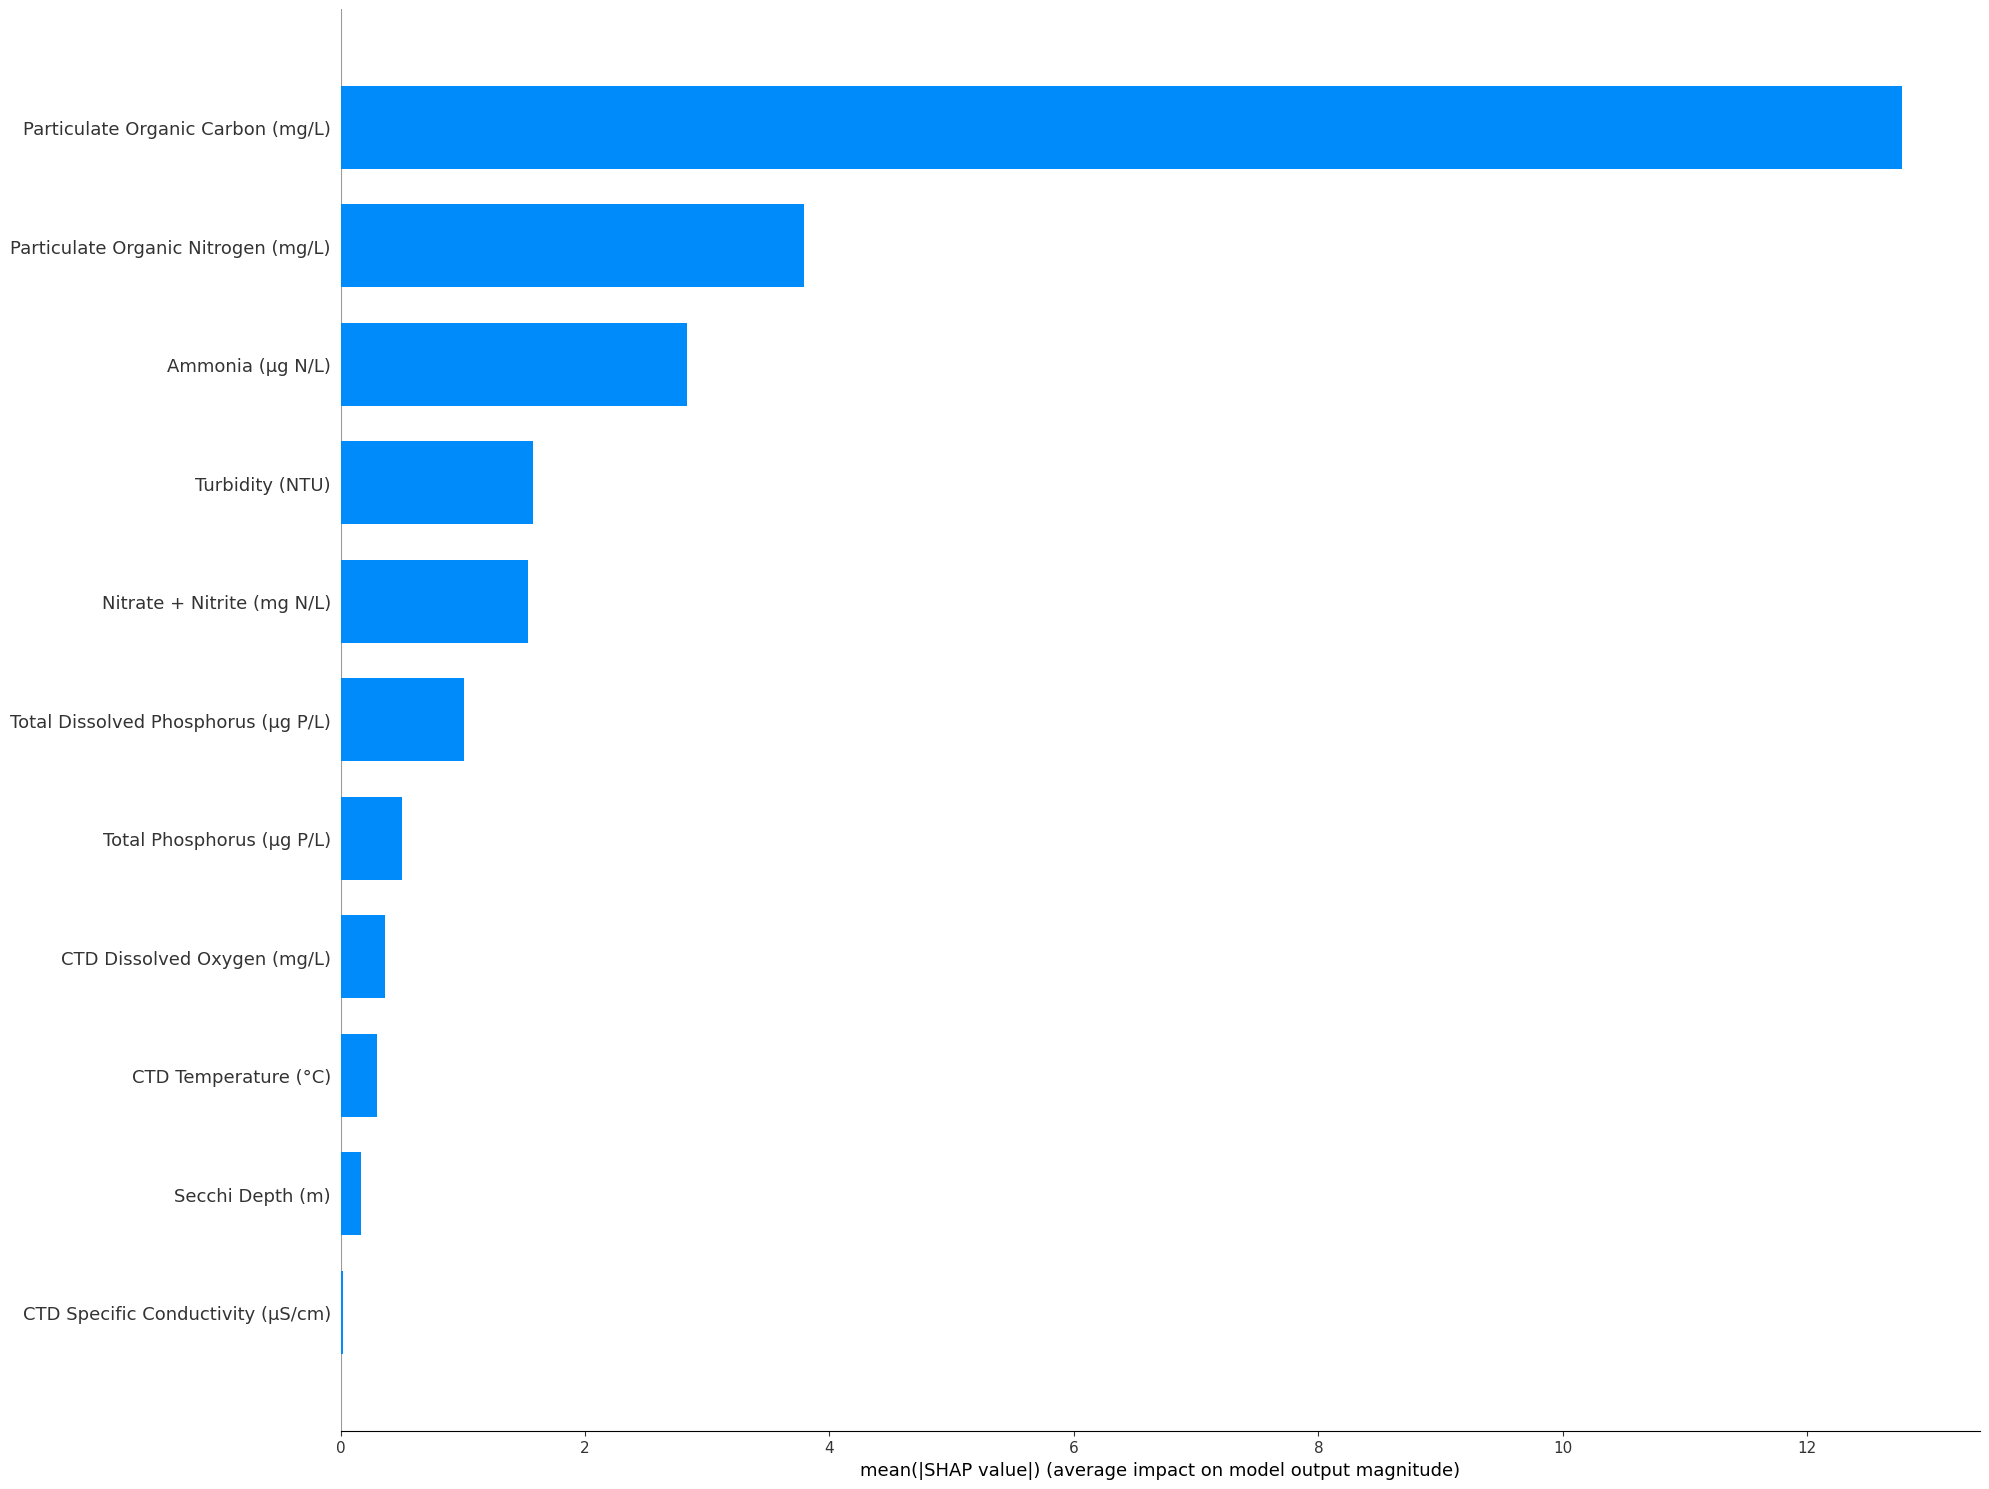

In [14]:
shap.summary_plot(shap_values, X_test,feature_names = features,plot_type="bar",plot_size = (20,15),show=False)